# **Vision Artificial**🤖

In [55]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [56]:
  #Cargar y dividir los datos
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

#Normalizar los valores para que se encuentren entre 0 y 1
train_images,test_images=train_images / 255.0, test_images/ 255.0

class_names=['airplane','automobile',
             'bird','cat','deer','dog',
             'frog','horse','ship','truck']


# 👀

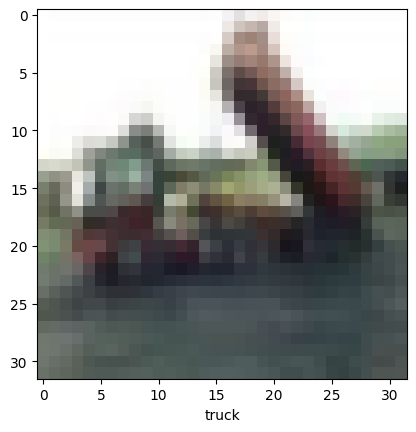

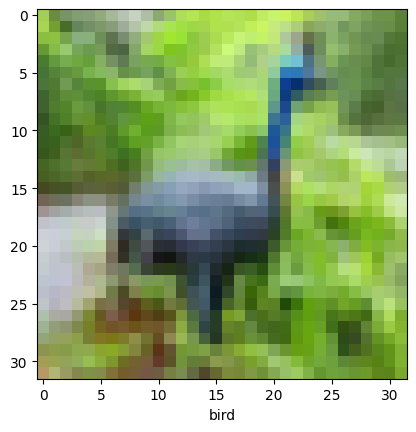

In [57]:
IMG_INDEX=2

plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()
IMG_INDEX=6

plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# **CNN Architecture** 🕸

*   Red Convolucional

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

## **Añadiendo Capas de densidad**


*   Permite extraer las caracterisiticas y clasificarlas



In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Entrenamiento**

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=1,
                    validation_data=(test_images,test_labels))

1563/1563 [==============================] - 72s 45ms/step - loss: 1.4410 - accuracy: 0.4793 - val_loss: 1.2482 - val_accuracy: 0.5543


**Evaluacion**

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 5s - loss: 1.2482 - accuracy: 0.5543 - 5s/epoch - 17ms/step
0.5543000102043152


# **Data Augmentation**🖼️


*   Tecnica estadistica de estimacion de datos
*   Las mismas imagenes del dataset se rotan y aumentan para tener nuevas imagenes y puntos de vista para que la vision artificial se entrene

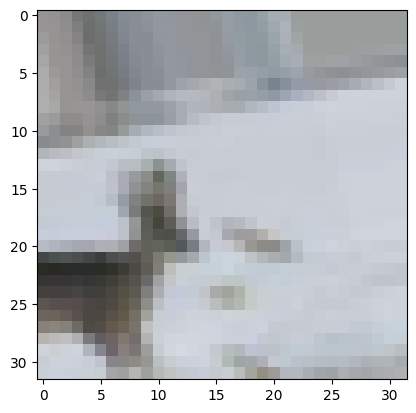

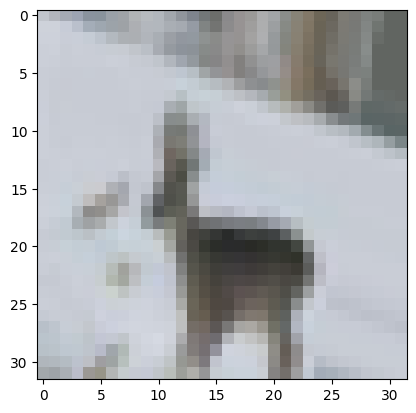

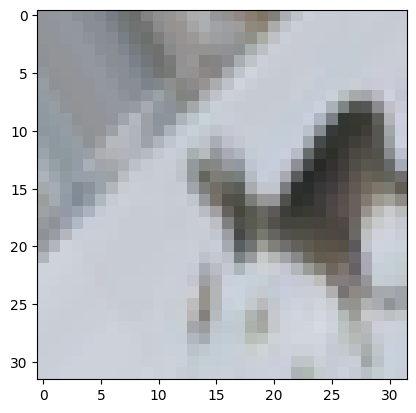

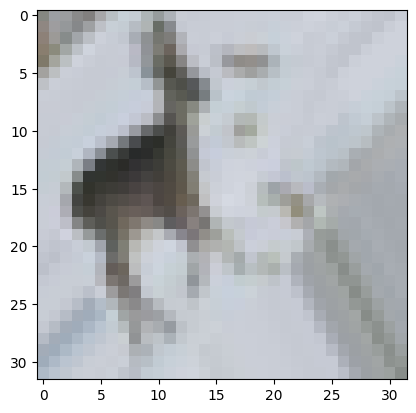

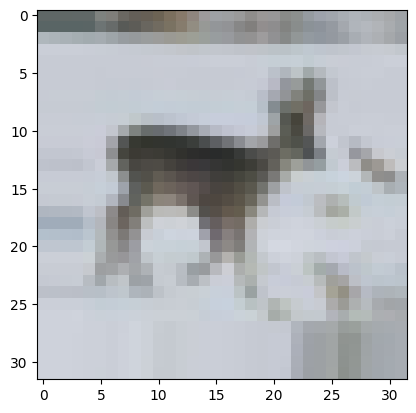

In [34]:
from keras.preprocessing import image
from keras.preprocessing.image import  ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')


test_img=train_images[20]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i=0

for batch in datagen.flow(img, save_prefix='test', save_format='jpg'):
  plt.figure(i)
  plot=plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break
plt.show()

# **Afinar detalles**

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras=tf.keras
import tensorflow_datasets as tfds

In [59]:
tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata=tfds.load(
      'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# 🔍🔍

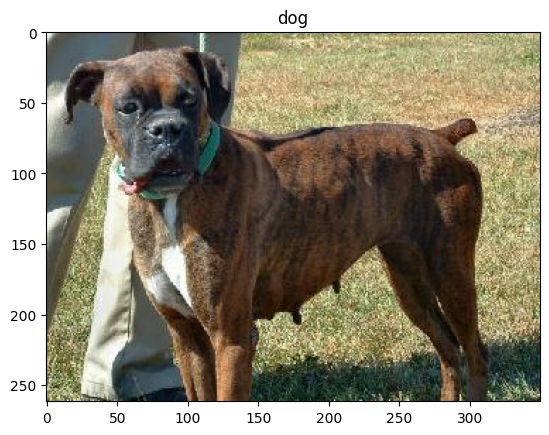

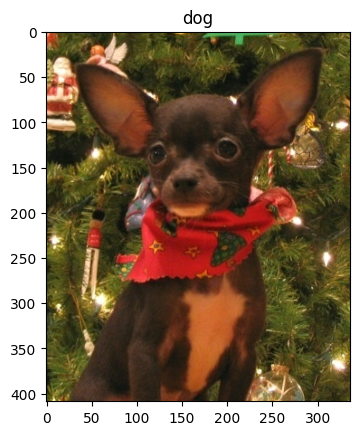

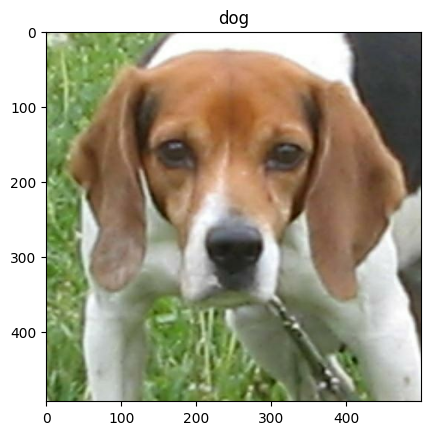

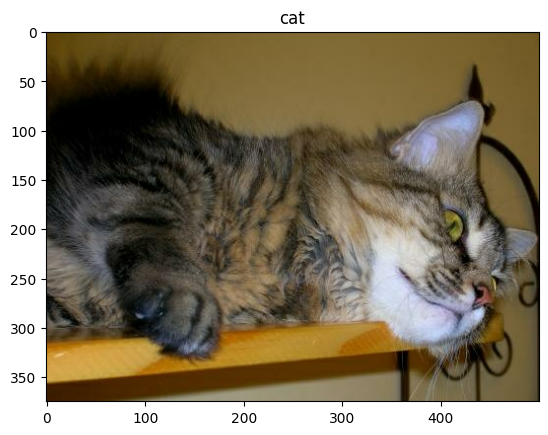

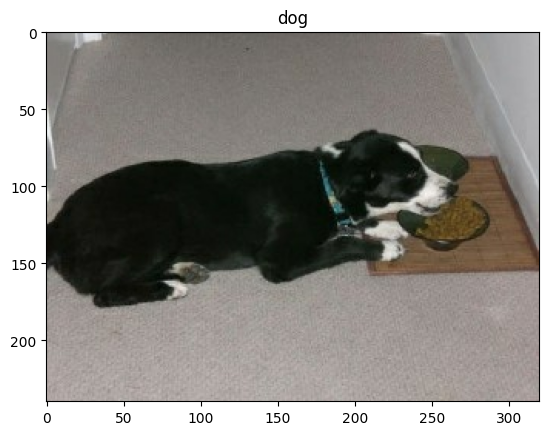

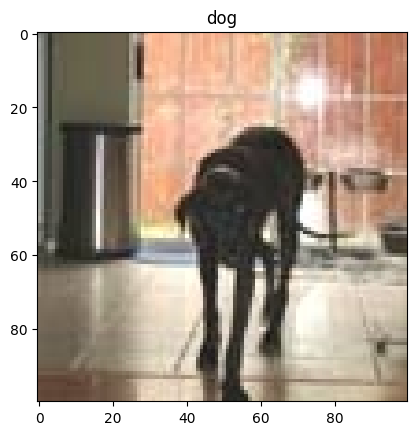

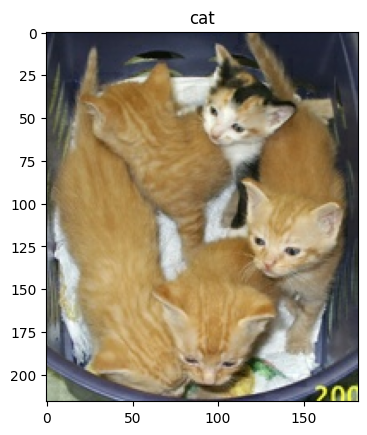

In [60]:
get_label_name=metadata.features['label'].int2str

for image,label in raw_train.take(7):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [61]:
IMG_SIZE= 160 #160X160

def format_example(image, label):
  image=  tf.cast(image, tf.float32)
  image=(image/127.5)-1
  image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))
  return image,label

In [62]:
train = raw_train.map(format_example)
validation= raw_validation.map(format_example)
test= raw_test.map(format_example)

# 🕵🏽

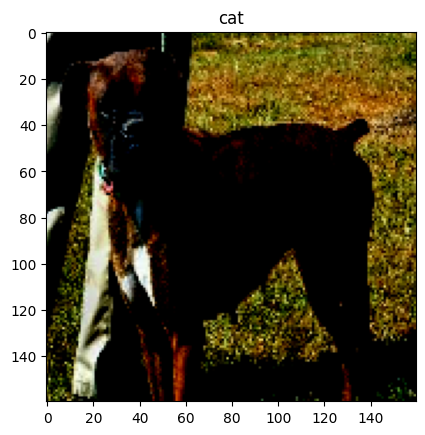

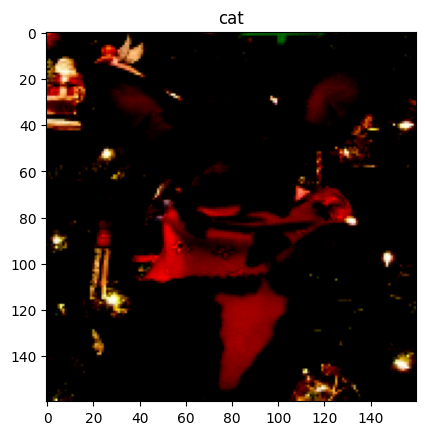

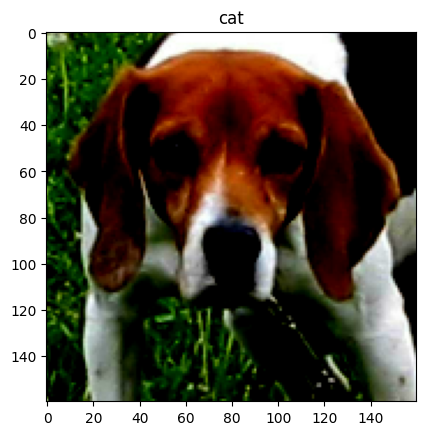

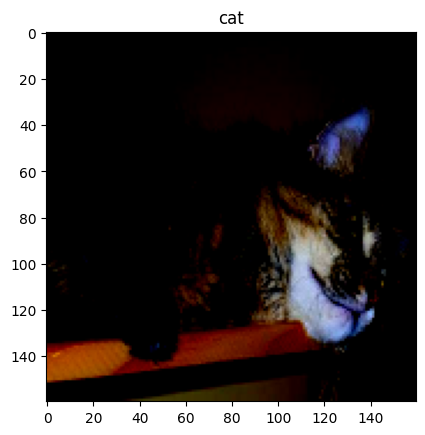

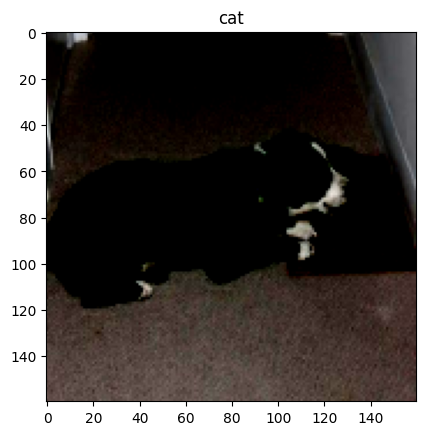

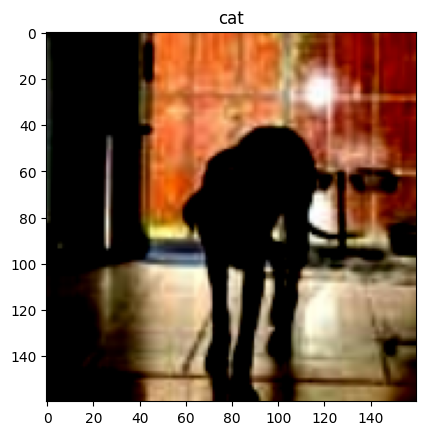

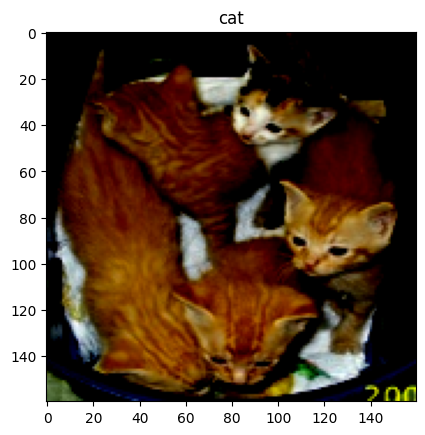

In [49]:
for image,loabel in train.take(7):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [76]:
IMG_SHAPE=(IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')

In [51]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [73]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [72]:


for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


In [79]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)
